# SYDE 556/750 --- Assignment 4
**Student ID: 20772297**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

In [2]:
def rmse(x, y):
    return np.sqrt(np.mean((x - y)**2))
seed = 18945

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

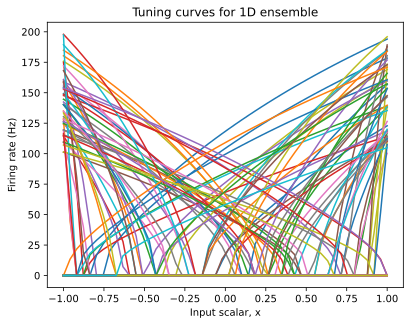

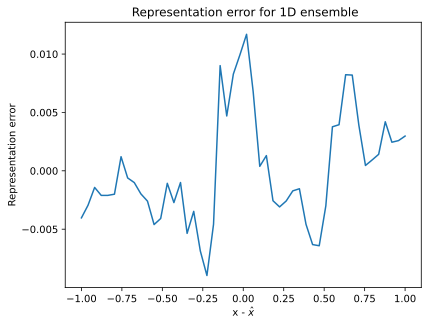

RMSE:  0.004705086815131159


In [3]:
def q1a():
    np.random.seed(seed)
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    model = nengo.Network()
    with model:

        ens_1d = nengo.Ensemble(num_neurons,intercepts=intercepts,max_rates=max_rates, dimensions=1,neuron_type=nengo.LIF())
        conn = nengo.Connection(ens_1d, ens_1d,synapse=0.01)
        
        
    with nengo.Simulator(model,seed=seed) as sim:
        eval_points, activities = tuning_curves(ens_1d, sim)
        eval_points,targets,decoded = eval_point_decoding(conn, sim,eval_points)

    plt.figure()
    plt.plot(eval_points, activities)
    # We could have alternatively shortened this to
    # plt.plot(*tuning_curves(ens_1d, sim))
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title("Tuning curves for 1D ensemble")
    plt.show()

    plt.figure()
    plt.plot(eval_points,targets - decoded)
    plt.ylabel("Representation error")
    plt.xlabel("x - $\hat{x}$")
    plt.title(" Representation error for 1D ensemble")
    plt.show()

    print("RMSE: ", np.sqrt(np.mean((targets - decoded)**2)))

q1a()

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

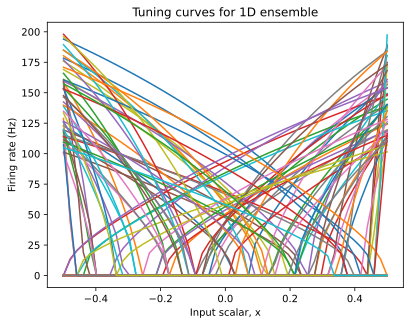

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

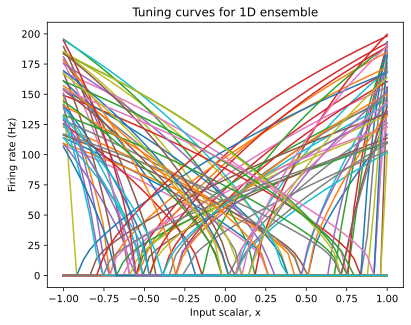

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

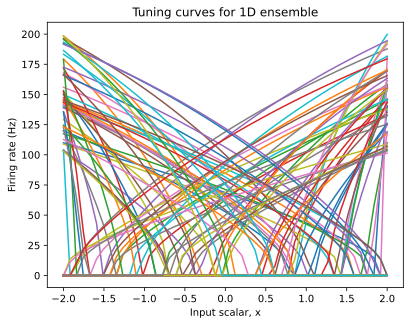

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

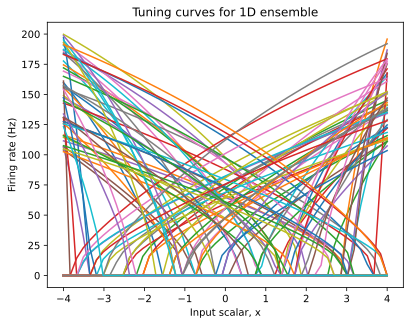

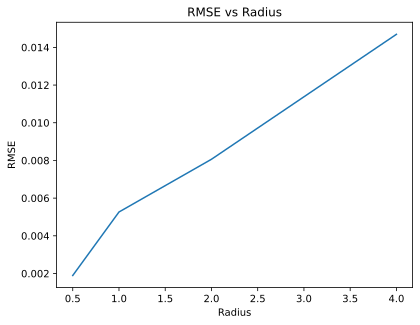

In [4]:
def q1b():
    np.random.seed(seed)
    num_neurons = 100
    radii = [ 0.5, 1.0, 2.0, 4]
    rmses = []
    for radius in radii:
        intercepts = np.random.uniform(-1, 1, num_neurons)
        max_rates = np.random.uniform(100, 200, num_neurons)
        model = nengo.Network(seed=seed)
        with model:

            ens_1d = nengo.Ensemble(num_neurons,intercepts=intercepts,max_rates=max_rates, dimensions=1,neuron_type=nengo.LIF(),radius=radius)
            conn = nengo.Connection(ens_1d, ens_1d,synapse=0.01)
        with nengo.Simulator(model) as sim:
            eval_points, activities = tuning_curves(ens_1d, sim)
            eval_points,targets,decoded = eval_point_decoding(conn, sim,eval_points)

        rmses.append(np.sqrt(np.mean((targets - decoded)**2)))
    
        plt.figure()
        plt.plot(eval_points, activities)
        # We could have alternatively shortened this to
        # plt.plot(*tuning_curves(ens_1d, sim))
        plt.ylabel("Firing rate (Hz)")
        plt.xlabel("Input scalar, x")
        plt.title("Tuning curves for 1D ensemble")
        plt.show()
    plt.figure()
    plt.plot(radii,rmses)
    plt.ylabel("RMSE")
    plt.xlabel("Radius")
    plt.title("RMSE vs Radius")
    plt.show()
q1b()

**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

There is an observed linear relationshup between RMSE and radius approximately y ~ 0.005x - 0.001. This makes sense because the larger the radius the larger proportion of values need to be represented.

**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

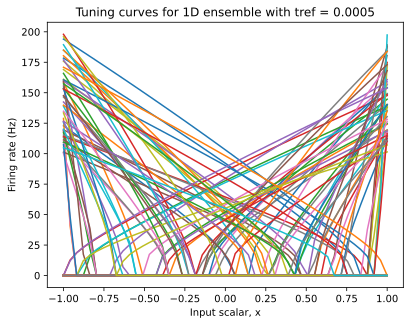

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

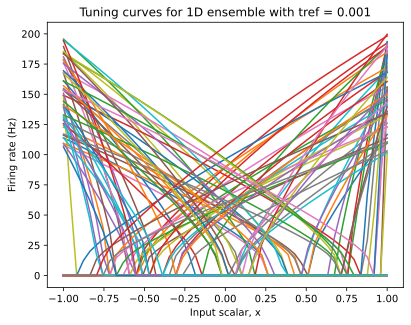

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

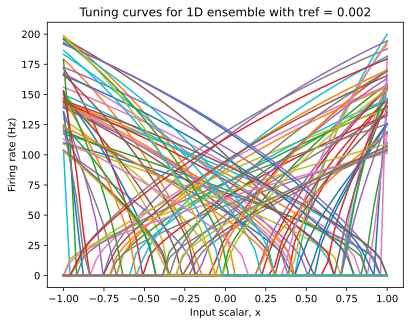

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

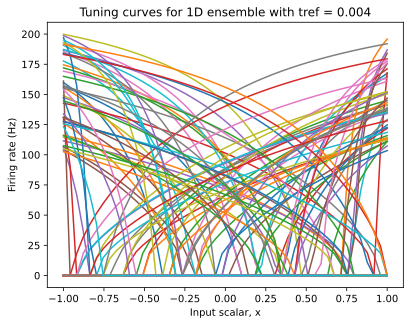

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

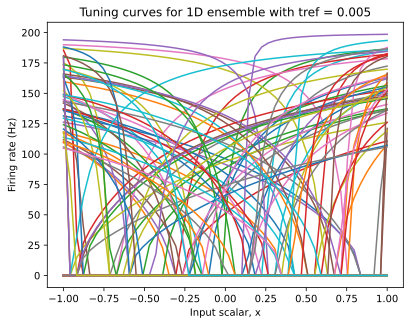

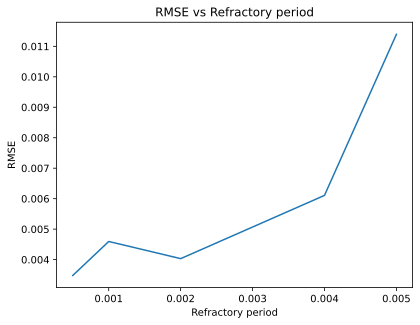

In [5]:
def q1d():
    np.random.seed(seed)
    num_neurons = 100
    trefs = [ 0.5e-3, 1.0e-3, 2.0e-3, 4e-3,5e-3]
    rmses = []
    for tref in trefs:
        intercepts = np.random.uniform(-1, 1, num_neurons)
        max_rates = np.random.uniform(100, 200, num_neurons)
        model = nengo.Network(seed=seed)
        with model:

            ens_1d = nengo.Ensemble(num_neurons,intercepts=intercepts,max_rates=max_rates, dimensions=1,neuron_type=nengo.LIF(tau_ref=tref))
            conn = nengo.Connection(ens_1d, ens_1d,synapse=0.01)
        with nengo.Simulator(model) as sim:
            eval_points, activities = tuning_curves(ens_1d, sim)
            eval_points,targets,decoded = eval_point_decoding(conn, sim,eval_points)

        rmses.append(np.sqrt(np.mean((targets - decoded)**2)))
        plt.figure()
        plt.plot(eval_points, activities)
        # We could have alternatively shortened this to
        # plt.plot(*tuning_curves(ens_1d, sim))
        plt.ylabel("Firing rate (Hz)")
        plt.xlabel("Input scalar, x")
        plt.title(f"Tuning curves for 1D ensemble with tref = {tref}")
        plt.show()
    plt.figure()
    plt.plot(trefs,rmses)
    plt.ylabel("RMSE")
    plt.xlabel("Refractory period")
    plt.title("RMSE vs Refractory period")
    plt.show()
q1d()

There is an observed linear relationship

**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

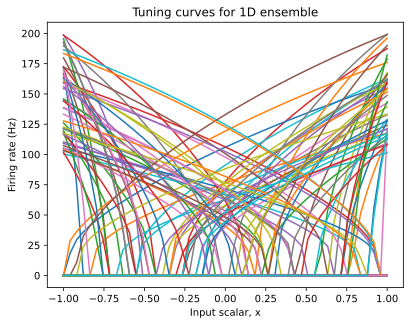

Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      


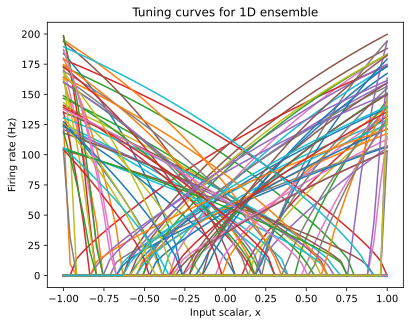

Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      


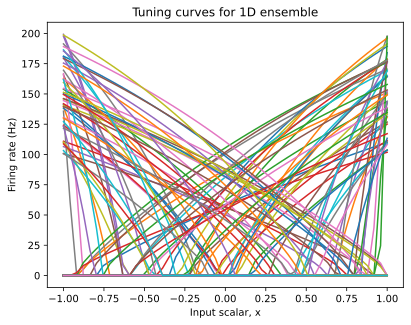

Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      


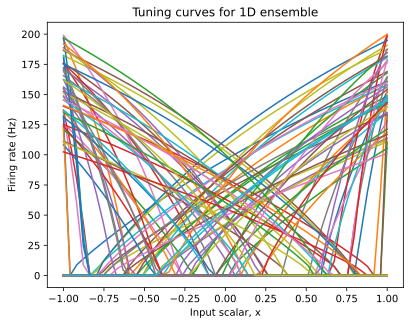

Build finished in 0:00:01.                                                      
Build finished in 0:00:01.                                                      


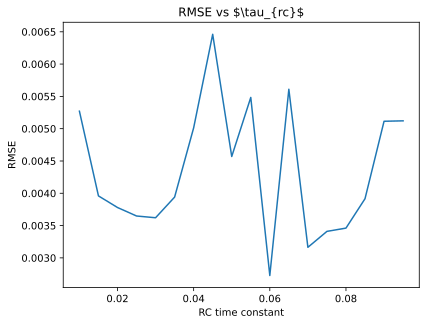

In [6]:
def q1e():
    num_neurons = 100
    trcs = [ i*1e-3 for i in range(10,100,5)]
    rmses = []
    iter = 0
    for trc in trcs:
        intercepts = np.random.uniform(-1, 1, num_neurons)
        max_rates = np.random.uniform(100, 200, num_neurons)
        model = nengo.Network()
        with model:

            ens_1d = nengo.Ensemble(num_neurons,intercepts=intercepts,max_rates=max_rates, dimensions=1,neuron_type=nengo.LIF(tau_rc=trc))
            conn = nengo.Connection(ens_1d, ens_1d,synapse=0.01)
        with nengo.Simulator(model) as sim:
            eval_points, activities = tuning_curves(ens_1d, sim)
            eval_points,targets,decoded = eval_point_decoding(conn, sim,eval_points)


        rmses.append(np.sqrt(np.mean((targets - decoded)**2)))
        if iter%5==0:
            plt.figure() # TODO MAKE NOT SO MANY PLOTS
            plt.plot(eval_points, activities)
            # We could have alternatively shortened this to
            # plt.plot(*tuning_curves(ens_1d, sim))
            plt.ylabel("Firing rate (Hz)")
            plt.xlabel("Input scalar, x")
            plt.title("Tuning curves for 1D ensemble")
            plt.show()
        iter+=1
    plt.figure()
    plt.plot(trcs,rmses)
    plt.ylabel("RMSE")
    plt.xlabel("RC time constant")
    plt.title("RMSE vs \$\\tau_{rc}\$")
    plt.show()
q1e()

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

There is no observed relationship between RMSE and the time constant. Howeever raising the refractory period constant causes the slopes of the tuning curves to increase dramatically which makes it more difficult to represent the input values as the neurons are less sensitive to changes in input, more closely resembling a step function or digital output.

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

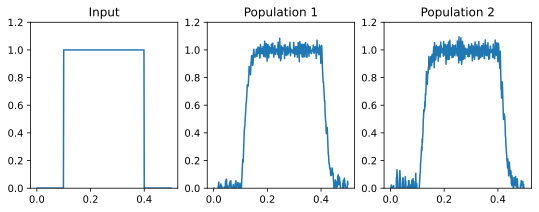

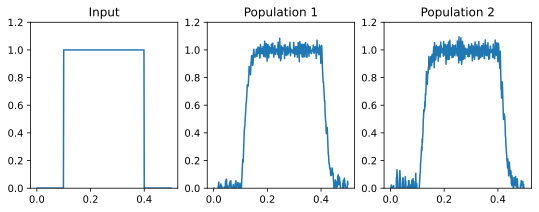

In [7]:
def q2a():
    np.random.seed(seed)
    model = nengo.Network(seed=seed)
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    interceps_half = np.random.uniform(-1, 1, num_neurons//2)
    max_rates_half = np.random.uniform(100, 200, num_neurons//2)
    with model:
        # Create an abstract input signal that oscillates as sin(t)
        nd_input = nengo.Node(lambda t: 0.0 if t < 0.1 else (1.0 if t < 0.4 else 0.0))

        # Create the neuronal ensembles
        A = nengo.Ensemble(num_neurons,intercepts=intercepts,max_rates=max_rates, dimensions=1,neuron_type=nengo.LIF())
        B = nengo.Ensemble(num_neurons//2,intercepts=interceps_half,max_rates=max_rates_half, dimensions=1,neuron_type=nengo.LIF())

        # Connect the input to the first neuronal ensemble
        nengo.Connection(nd_input, A,synapse=0.01)

        # Connect the first neuronal ensemble to the second
        # (this is the communication channel)
        nengo.Connection(A, B)
    with model:
        sin_probe = nengo.Probe(nd_input)
        A_probe = nengo.Probe(A, synapse=0.01)  # ensemble output
        B_probe = nengo.Probe(B, synapse=0.01)
    with nengo.Simulator(model) as sim:
        sim.run(0.5)
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input")
    plt.plot(sim.trange(), sim.data[sin_probe])
    plt.ylim(0, 1.2)
    plt.subplot(1, 3, 2)
    plt.title("Population 1")
    plt.plot(sim.trange(), sim.data[A_probe])
    plt.ylim(0, 1.2)
    plt.subplot(1, 3, 3)
    plt.title("Population 2")
    plt.plot(sim.trange(), sim.data[B_probe])
    plt.ylim(0, 1.2)
q2a()

**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

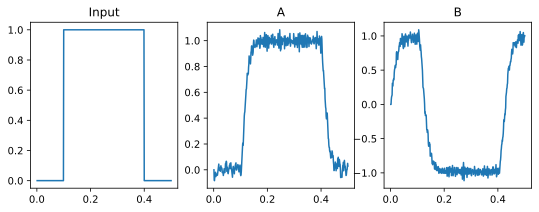

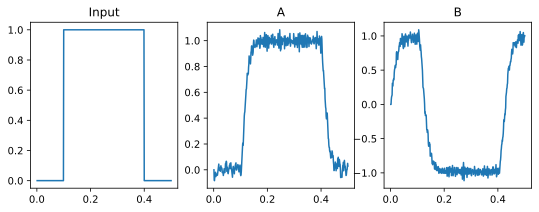

In [8]:
def q2b():
    np.random.seed(seed)
    model = nengo.Network(seed=seed)
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    interceps_half = np.random.uniform(-1, 1, num_neurons//2)
    max_rates_half = np.random.uniform(100, 200, num_neurons//2)
    with model:
        # Create an abstract input signal that oscillates as sin(t)
        nd_input = nengo.Node(lambda t: 0.0 if t < 0.1 else (1.0 if t < 0.4 else 0.0))

        # Create the neuronal ensembles
        A = nengo.Ensemble(num_neurons,intercepts=intercepts,max_rates=max_rates, dimensions=1,neuron_type=nengo.LIF())
        B = nengo.Ensemble(num_neurons//2,intercepts=interceps_half,max_rates=max_rates_half, dimensions=1,neuron_type=nengo.LIF())

        # Connect the input to the first neuronal ensemble
        nengo.Connection(nd_input, A,synapse=0.01)

        # Connect the first neuronal ensemble to the second
        # (this is the communication channel)
        nengo.Connection(A, B,function=lambda x: 1 - 2*x, synapse=0.01)
    with model:
        sin_probe = nengo.Probe(nd_input)
        A_probe = nengo.Probe(A, synapse=0.01)  # ensemble output
        B_probe = nengo.Probe(B, synapse=0.01)
    with nengo.Simulator(model) as sim:
        sim.run(0.5)
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input")
    plt.plot(sim.trange(), sim.data[sin_probe])
    plt.subplot(1, 3, 2)
    plt.title("A")
    plt.plot(sim.trange(), sim.data[A_probe])
    plt.subplot(1, 3, 3)
    plt.title("B")
    plt.plot(sim.trange(), sim.data[B_probe])
q2b()

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

The desired dynamical system is $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{u}$ which means $\mathbf{A} = 0$ and $\mathbf{B} = 1$. The matrices $\mathbf{A}'$ and $\mathbf{B}'$ are $\mathbf{A}' = I$ and $\mathbf{B}' = \tau I$.

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

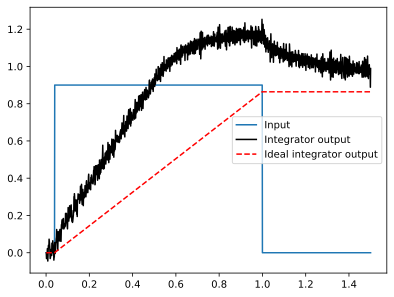

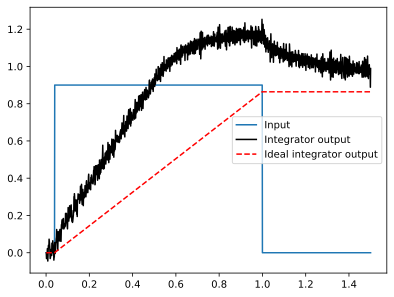

In [9]:
def ideal_integrator(t,x):
    return np.where(t < 0.04, 0, x + 0.9 * (t - 0.04))
def q3b():
    model = nengo.Network(label="Integrator")
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    with model:
        # Our ensemble consists of 100 leaky integrate-and-fire neurons,
        # representing a one-dimensional signal
        A = nengo.Ensemble(100, dimensions=1,intercepts=intercepts,max_rates=max_rates,neuron_type=nengo.LIF())
        input = nengo.Node(lambda t: 0 if t < 0.04 else (0.9 if t < 1.0 else 0.0))
        tau = 0.1
        nengo.Connection(A, A, transform=[[1]], synapse=50e-3)  # Using a long time constant for stability

        # Connect the input
        nengo.Connection(input, A, transform=[[tau]], synapse=5e-3)  # The same time constant as recurrent to make it more 'ideal'
        input_probe = nengo.Probe(input)
        A_probe = nengo.Probe(A, synapse=0.01)
    with nengo.Simulator(model) as sim:
    # Run it for 6 seconds
        sim.run(1.5)
    plt.figure()
    ideal = lambda t: 0 if t < 0.04 else (0.9*t if t < 1.0 else 0.9)
    
    plt.plot(sim.trange(), sim.data[input_probe], label="Input")
    plt.plot(sim.trange(), sim.data[A_probe], "k", label="Integrator output")
    plt.plot(sim.trange(), np.cumsum(sim.data[input_probe])*0.001, "r--", label="Ideal integrator output")
    plt.legend()
q3b()


**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

The ideal result is $$\int_{0}^{t} u(t') \,\mathrm{d}{t'} = \begin{cases} 0 & \text{if } t < 0.04 \,,\\
					0.9*(t-0.04) & \text{if } 0.04 \leq t < 1 \,,\\
					0.9 *0.96 & \text{if } 1 \leq t \,.\\
				\end{cases}$$. The simulated output is pretty bad due to mismatched time constants. This lets the approximation overshoot the step function and very quickly begin to forget.

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

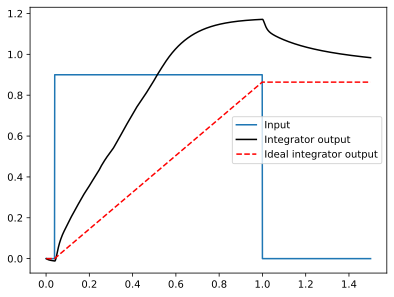

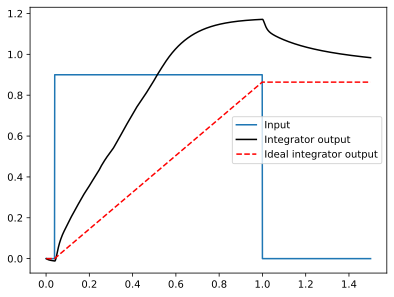

In [10]:
def q3d():
    model = nengo.Network(label="Integrator")
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    with model:
        # Our ensemble consists of 100 leaky integrate-and-fire neurons,
        # representing a one-dimensional signal
        A = nengo.Ensemble(100, dimensions=1,neuron_type=nengo.LIFRate(),intercepts=intercepts,max_rates=max_rates)
        input = nengo.Node(lambda t: 0 if t < 0.04 else (0.9 if t < 1.0 else 0.0))
        tau = 0.1
        nengo.Connection(A, A, transform=[[1]], synapse=0.05)  # Using a long time constant for stability

        # Connect the input
        nengo.Connection(input, A, transform=[[tau]], synapse=0.005)  # The same time constant as recurrent to make it more 'ideal'
        input_probe = nengo.Probe(input)
        A_probe = nengo.Probe(A, synapse=0.01)
    with nengo.Simulator(model) as sim:
    # Run it for 6 seconds
        sim.run(1.5)
    plt.figure()
    plt.plot(sim.trange(), sim.data[input_probe], label="Input")
    plt.plot(sim.trange(), sim.data[A_probe], "k", label="Integrator output")
    plt.plot(sim.trange(), np.cumsum(sim.data[input_probe])*0.001, "r--", label="Ideal integrator output")
    plt.legend()
q3d()

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

This solution is much cleaner than the spiking neurons due to the removal of noise associated. It still maintains all the same issues with overshoot and forgetting.

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

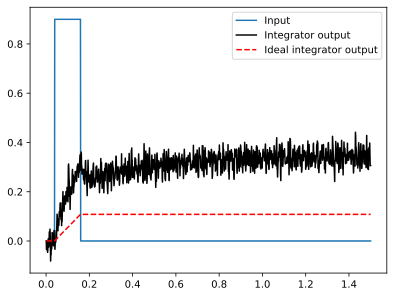

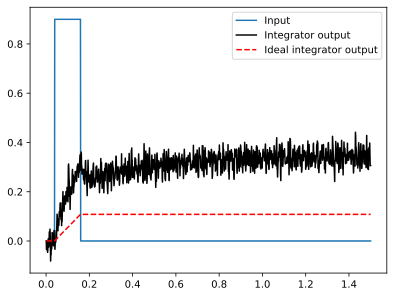

In [11]:
def q3f():
    model = nengo.Network(label="Integrator")
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    with model:
        # Our ensemble consists of 100 leaky integrate-and-fire neurons,
        # representing a one-dimensional signal
        A = nengo.Ensemble(100, dimensions=1,intercepts=intercepts,max_rates=max_rates,neuron_type=nengo.LIF())
        input = nengo.Node(lambda t: 0 if t < 0.04 else (0.9 if t < 0.16 else 0.0))
        tau = 0.1
        nengo.Connection(A, A, transform=[[1]], synapse=0.05)  # Using a long time constant for stability

        # Connect the input
        nengo.Connection(input, A, transform=[[tau]], synapse=0.005)  # The same time constant as recurrent to make it more 'ideal'
        input_probe = nengo.Probe(input)
        A_probe = nengo.Probe(A, synapse=0.01)
    with nengo.Simulator(model) as sim:
        sim.run(1.5)
    plt.figure()
    plt.plot(sim.trange(), sim.data[input_probe], label="Input")
    plt.plot(sim.trange(), sim.data[A_probe], "k", label="Integrator output")
    plt.plot(sim.trange(), np.cumsum(sim.data[input_probe])*0.001, "r--", label="Ideal integrator output")
    plt.legend()
q3f()

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

The ideal equation is $$\int_{0}^{t} u(t') \,\mathrm{d}{t'} = \begin{cases} 0 & \text{if } t < 0.04 \,,\\
                    0.9*(t-0.04) & \text{if } 0.04 \leq t < 0.16 \,,\\
                    0.9 *0.12 & \text{if } 0.16 \leq t \,.\\
                \end{cases}$$. This works more or less as intended but still overshoots the ideal slop and actually seems to be increasing instead of remaining steady over time. It seems worse overall.

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

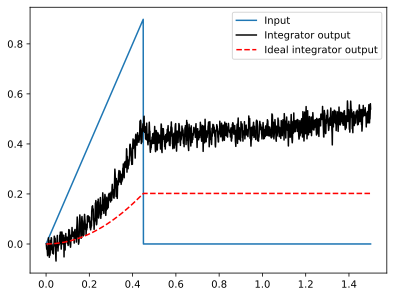

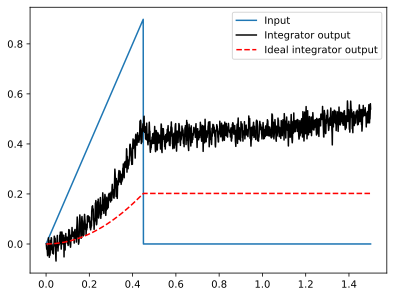

In [12]:
def q3h():
    model = nengo.Network(label="Integrator")
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    with model:
        # Our ensemble consists of 100 leaky integrate-and-fire neurons,
        # representing a one-dimensional signal
        A = nengo.Ensemble(100, dimensions=1,intercepts=intercepts,max_rates=max_rates,neuron_type=nengo.LIF())
        input = nengo.Node(lambda t: 0 if t < 0 else (2*t if t < 0.45 else 0.0))
        tau = 0.1
        nengo.Connection(A, A, transform=[[1]], synapse=0.05)  # Using a long time constant for stability

        # Connect the input
        nengo.Connection(input, A, transform=[[tau]], synapse=0.005)  # The same time constant as recurrent to make it more 'ideal'
        input_probe = nengo.Probe(input)
        A_probe = nengo.Probe(A, synapse=0.01)
    with nengo.Simulator(model) as sim:
    # Run it for 6 seconds
        sim.run(1.5)
    plt.figure()
    plt.plot(sim.trange(), sim.data[input_probe], label="Input")
    plt.plot(sim.trange(), sim.data[A_probe], "k", label="Integrator output")
    plt.plot(sim.trange(), np.cumsum(sim.data[input_probe])*0.001, "r--", label="Ideal integrator output")
    plt.legend()
q3h()

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

The ideal equation is $$\int_{0}^{t} u(t') \,\mathrm{d}{t'} = \begin{cases} 0 & \text{if } t < 0 \,,\\
                    t^2 & \text{if } 0 \leq t < 0.45 \,,\\
                    0.9^2 & \text{if } 0.45 \leq t \,.\\
                \end{cases}$$. 

It does a reasonable good job of tracking until it starts to forget. It again overshoots greatly.

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

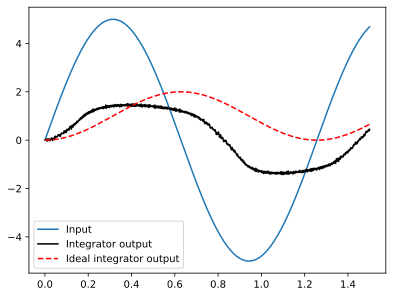

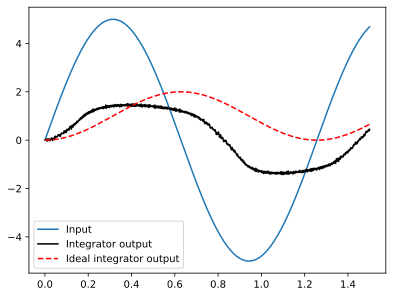

In [13]:
def q3j():
    model = nengo.Network(label="Integrator")
    num_neurons = 100
    intercepts = np.random.uniform(-1, 1, num_neurons)
    max_rates = np.random.uniform(100, 200, num_neurons)
    with model:
        # Our ensemble consists of 100 leaky integrate-and-fire neurons,
        # representing a one-dimensional signal
        A = nengo.Ensemble(100, dimensions=1,intercepts=intercepts,max_rates=max_rates,neuron_type=nengo.LIF())
        input = nengo.Node(lambda t: 0 if t < 0 else 5*np.sin(5*t))
        tau = 0.1
        nengo.Connection(A, A, transform=[[1]], synapse=0.05)  # Using a long time constant for stability

        # Connect the input
        nengo.Connection(input, A, transform=[[tau]], synapse=0.005)  # The same time constant as recurrent to make it more 'ideal'
        input_probe = nengo.Probe(input)
        A_probe = nengo.Probe(A, synapse=0.01)
    with nengo.Simulator(model) as sim:
    # Run it for 6 seconds
        sim.run(1.5)
    plt.figure()
    plt.plot(sim.trange(), sim.data[input_probe], label="Input")
    plt.plot(sim.trange(), sim.data[A_probe], "k", label="Integrator output")
    plt.plot(sim.trange(), np.cumsum(sim.data[input_probe])*0.001, "r--", label="Ideal integrator output")
    plt.legend()

q3j()

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

The ideal equation is $$\int_{0}^{t} u(t') \,\mathrm{d}{t'} = - \cos(5t)$$. In this case the model struggles to track as the sinusoidal nature of the input means it has accumulating error.

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

✍ \<YOUR SOLUTION HERE\>

In [14]:
# ✍ <YOUR SOLUTION HERE>